In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [20]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data cleaning

In [38]:
df.duplicated().sum()

0

In [39]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [45]:
df.query('Item_Outlet_Sales'>834)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [66]:
df.drop(columns='Outlet_Size',inplace=True,axis=1)

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [68]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [79]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
df1 = df.dropna()
df1.shape

(4650, 12)

### Q1 : What is the most iteme sold

In [69]:
first_question=df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
item_name=first_question.sort_values(ascending=False).index
item_name

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Meat',
       'Soft Drinks', 'Breads', 'Hard Drinks', 'Starchy Foods', 'Others',
       'Breakfast', 'Seafood'],
      dtype='object', name='Item_Type')

In [70]:
item_price = first_question.sort_values(ascending=False).values
item_price

array([2820059.8168, 2732786.087 , 2055493.7132, 1825734.7886,
       1522594.0512, 1444151.4926, 1265525.3422, 1045200.1378,
        917565.612 ,  892897.722 ,  553237.1888,  457793.4272,
        351401.2504,  325517.6096,  232298.9516,  148868.2194])

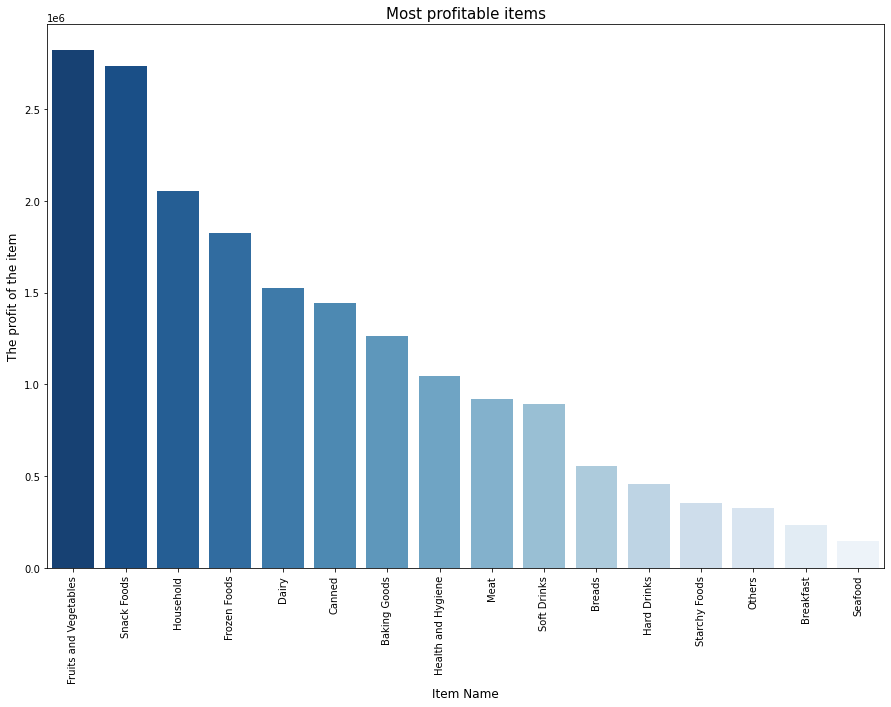

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(x=item_name,y=item_price,palette='Blues_r')
plt.title('Most profitable items',fontsize=15)
plt.xlabel('Item Name',fontsize=12)
plt.ylabel('The profit of the item',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Q2 : do our customers prefere healthy items or not

In [73]:
second_question=df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
item_type=second_question.sort_values(ascending=False).index
item_type

Index(['Low Fat', 'Regular', 'LF', 'low fat', 'reg'], dtype='object', name='Item_Fat_Content')

In [74]:
item_price2 = second_question.sort_values(ascending=False).values
item_price2

array([11015025.161 ,  6457454.382 ,   655242.4094,   233826.9626,
         229576.4954])

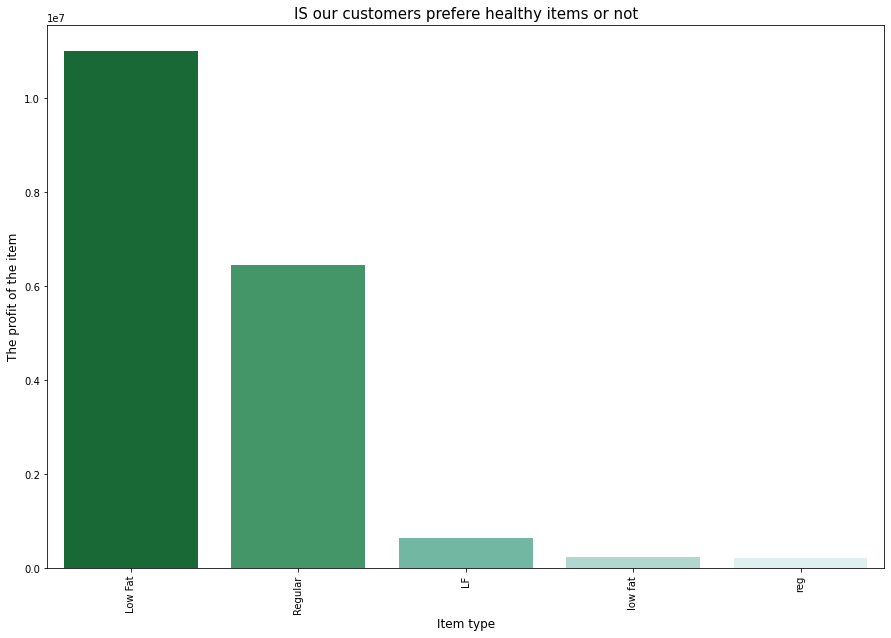

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(x=item_type,y=item_price2,palette='BuGn_r')
plt.title('IS our customers prefere healthy items or not',fontsize=15)
plt.xlabel('Item type',fontsize=12)
plt.ylabel('The profit of the item',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Q3 : Which market type sales most ?

In [76]:
third_question=df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
Outlet_Type=third_question.sort_values(ascending=False).index
Outlet_Type

Index(['Supermarket Type1', 'Supermarket Type3', 'Supermarket Type2',
       'Grocery Store'],
      dtype='object', name='Outlet_Type')

In [77]:
item_price3 = third_question.sort_values(ascending=False).values
item_price3

array([12917342.263 ,  3453926.0514,  1851822.83  ,   368034.266 ])

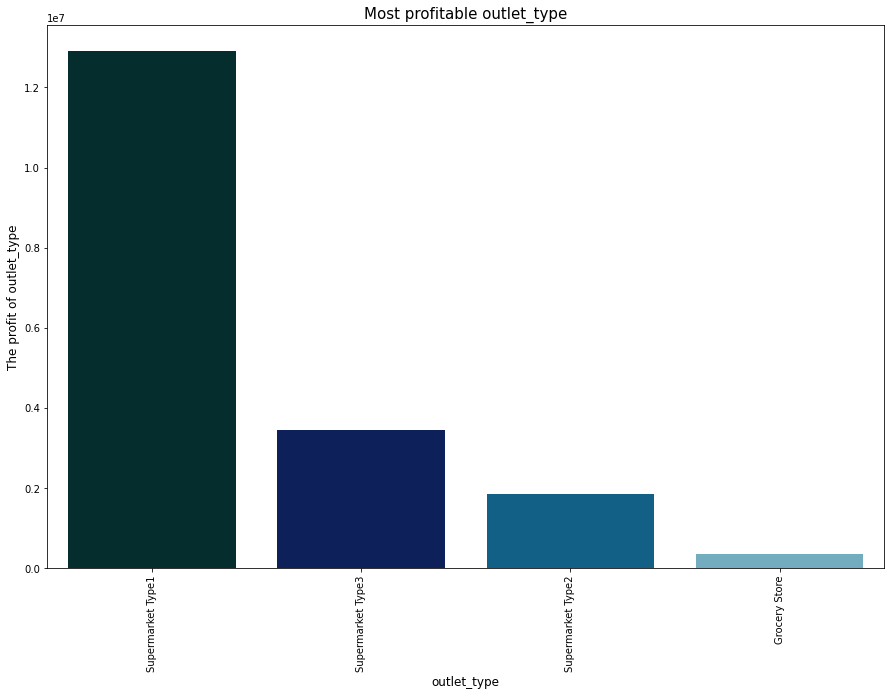

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(x=Outlet_Type,y=item_price3,palette='ocean')
plt.title('Most profitable outlet_type',fontsize=15)
plt.xlabel('outlet_type',fontsize=12)
plt.ylabel('The profit of outlet_type',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Q4 : What is the most profitable tier

In [84]:
fourth_question=df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
tier=fourth_question.sort_values(ascending=False)
tier.values

array([7636752.632 , 6472313.7064, 4482059.072 ])

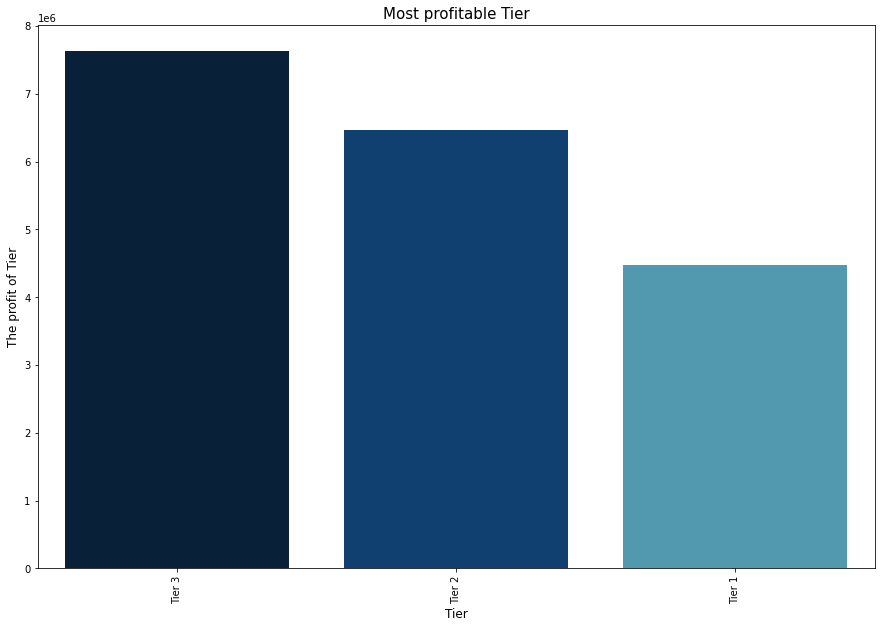

In [86]:
plt.figure(figsize=(15,10))
sns.barplot(x=tier.index,y=tier.values,palette='ocean')
plt.title('Most profitable Tier',fontsize=15)
plt.xlabel('Tier',fontsize=12)
plt.ylabel('The profit of Tier',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Q5 : Which items are more visible

In [106]:
q55=df.groupby('Item_Type')['Item_Visibility'].sum()
q55.sort_values(ascending=False)

Item_Type
Fruits and Vegetables    84.407946
Snack Foods              80.220267
Frozen Foods             56.192325
Household                55.803305
Dairy                    49.395349
Baking Goods             44.821706
Canned                   44.215926
Health and Hygiene       28.712309
Soft Drinks              28.467650
Meat                     26.470620
Breads                   16.630030
Hard Drinks              13.897707
Others                   10.180734
Starchy Foods             9.999407
Breakfast                 9.429531
Seafood                   4.798469
Name: Item_Visibility, dtype: float64

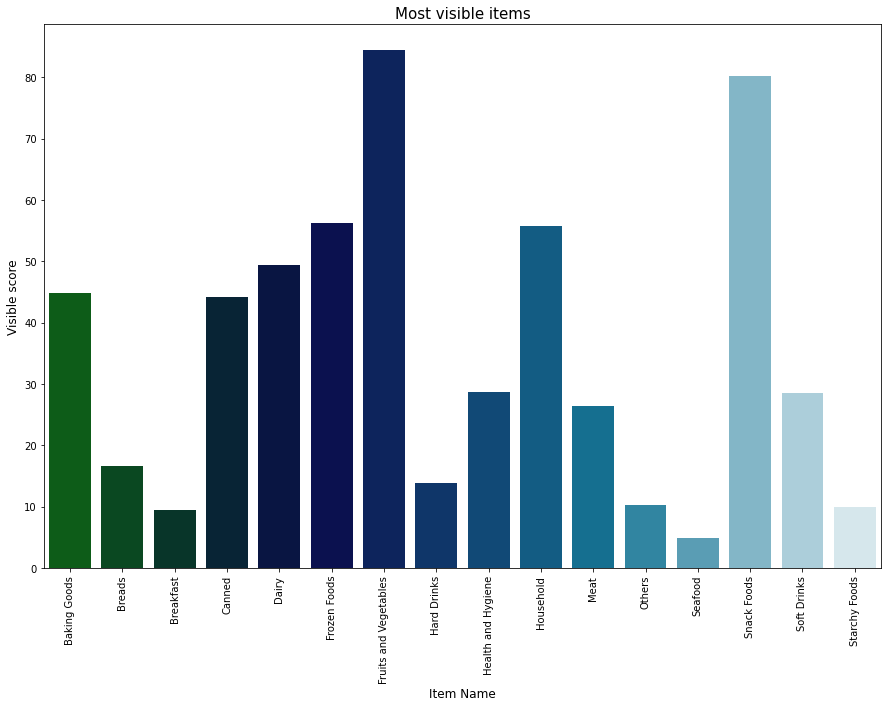

In [109]:
plt.figure(figsize=(15,10))
sns.barplot(x=q55.index,y=q55.values,palette='ocean')
plt.title('Most visible items',fontsize=15)
plt.xlabel('Item Name',fontsize=12)
plt.ylabel('Visible score',fontsize=12)
plt.xticks(rotation=90)
plt.show()